# Diabetic Retinopathy Detection
Diabetic retinopathy is a diabetes-related eye disease that affects the retina. It is a leading cause of blindness in adults. Early detection and timely intervention are crucial to prevent vision loss. Artificial intelligence (AI) and machine learning (ML) techniques have shown promise in the field of diabetic retinopathy detection.



In [1]:
import time
import warnings
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from tqdm import tqdm
import matplotlib.pylab as plt
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

import os
import cv2

def get_filename(path:str):#arg should be (train or test) in our case
    L=[]
    diab_stage,file_name=[],[]
    for dirname, _, filenames in os.walk('DR_data_cropped_classes/'+path):
        for filename in filenames:
            L.append(os.path.join(dirname,filename))
            file_name.append(filename)
            diab_stage.append(dirname.split('/')[-1])
    return  L,{'stage':diab_stage,'name':file_name}

/home/moe/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Exploring Data

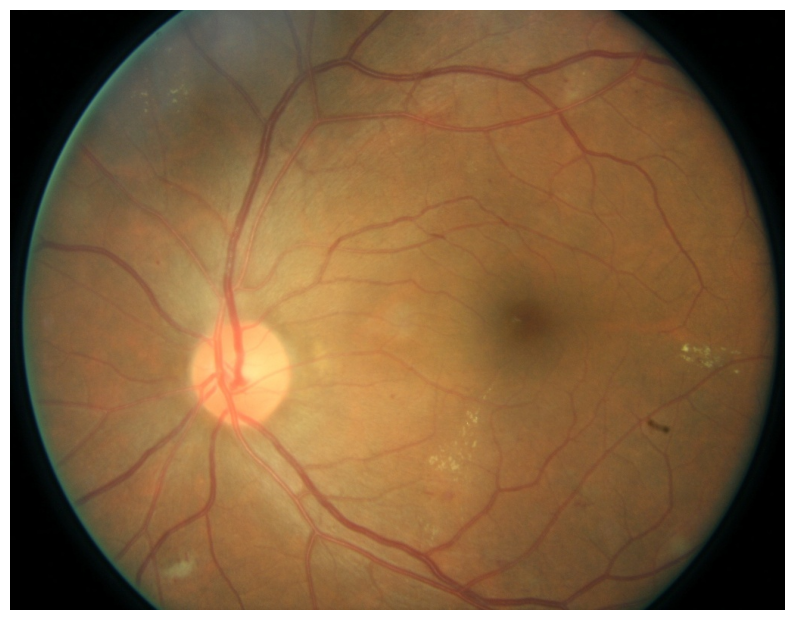

In [2]:
imgpath,dict=get_filename('train')
fig, ax = plt.subplots(figsize=(10, 10))
img= plt.imread(imgpath[1])
ax.imshow(img)
ax.axis('off')
plt.show()

In [3]:
imgpath,dict_test=get_filename('test')
train_data= pd.DataFrame(dict)
test_data = pd.DataFrame(dict_test)
test_data.to_pickle('test_data.pkl')
train_data.head()

stage              name
0     3    9526_left.jpeg
1     3   6687_right.jpeg
2     3   18487_left.jpeg
3     3  34524_right.jpeg
4     3  26299_right.jpeg

Number of Images in train dataset:  4080
Number of Images in test dataset:  500


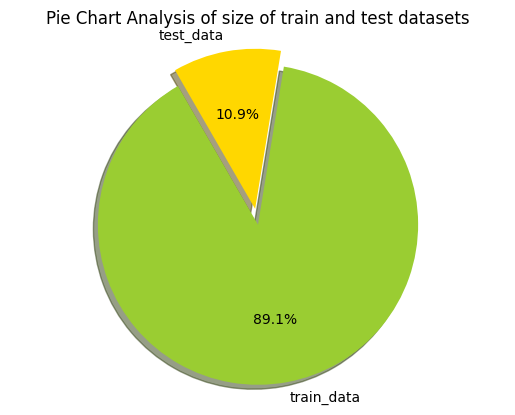

In [4]:
data = [len(train_data), len(test_data)]
print("Number of Images in train dataset: ", data[0])
print("Number of Images in test dataset: ", data[1])
labels = ['train_data','test_data']
plt.pie(data,explode = [0,0.1], labels= labels, shadow = True, colors = ['yellowgreen','gold'],autopct='%1.1f%%', startangle = 120)
plt.title('Pie Chart Analysis of size of train and test datasets')
plt.axis('equal')
plt.show()

In [5]:
class_labels = {0: 'No DR',1: 'Mild', 2: 'Moderate', 3: 'Severe', 4: 'Proliferative DR'}
train_data['stage']=train_data['stage'].astype('int')
test_data['stage']=test_data['stage'].astype('int')
class_labels_ = list(set(train_data['stage']))
print("Number of target classes: {}".format(class_labels_))

Number of target classes: [0, 1, 2, 3, 4]


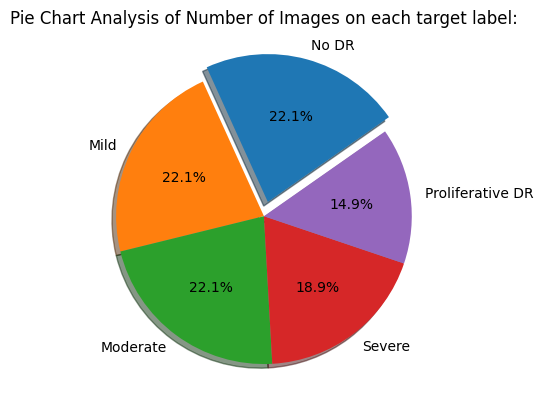

In [6]:
class_sizes = []
for i in range(0,5):
    class_sizes.append(list(train_data['stage']).count(i))
labels = class_labels.values()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','darkgreen']
plt.pie(class_sizes,explode = [0.1,0,0,0,0], labels= labels, shadow = True,autopct='%1.1f%%', startangle = 35)
plt.title('Pie Chart Analysis of Number of Images on each target label:')
plt.show()

In [7]:
def image_analysis(dataframe, path):
    width_range = []
    height_range = []
    for i in range(dataframe.shape[0]):
        img = cv2.imread(path+'/'+ str(dataframe.iloc[i]['stage'])+'/'+str(dataframe.iloc[i]['name']))
        height, width, _ = img.shape
        width_range.append(width)
        height_range.append(height)
    return width_range, height_range

In [8]:
width_range, height_range = image_analysis(train_data, 'DR_data_cropped_classes/train')

In [9]:
avg_width = sum(width_range)/len(width_range)
avg_height = sum(height_range)/len(height_range)
max_width = max(width_range)
max_height = max(height_range)
min_width = min(width_range)
min_height = min(height_range)
print("Average width of images in training set: {}".format(int(avg_width)))
print("Average height of images in training set: {}".format(int(avg_height)))
print("-"*100)
print("Maximum width of images in training set: {}".format(max_width))
print("Maximum height of images in training set: {}".format(max_height))
print("-"*100)
print("Minimum width of images in training set: {}".format(min_width))
print("Minimum height of images in training set: {}".format(min_height))

Average width of images in training set: 1023
Average height of images in training set: 910
----------------------------------------------------------------------------------------------------
Maximum width of images in training set: 1024
Maximum height of images in training set: 1030
----------------------------------------------------------------------------------------------------
Minimum width of images in training set: 336
Minimum height of images in training set: 314


[1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 336, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024

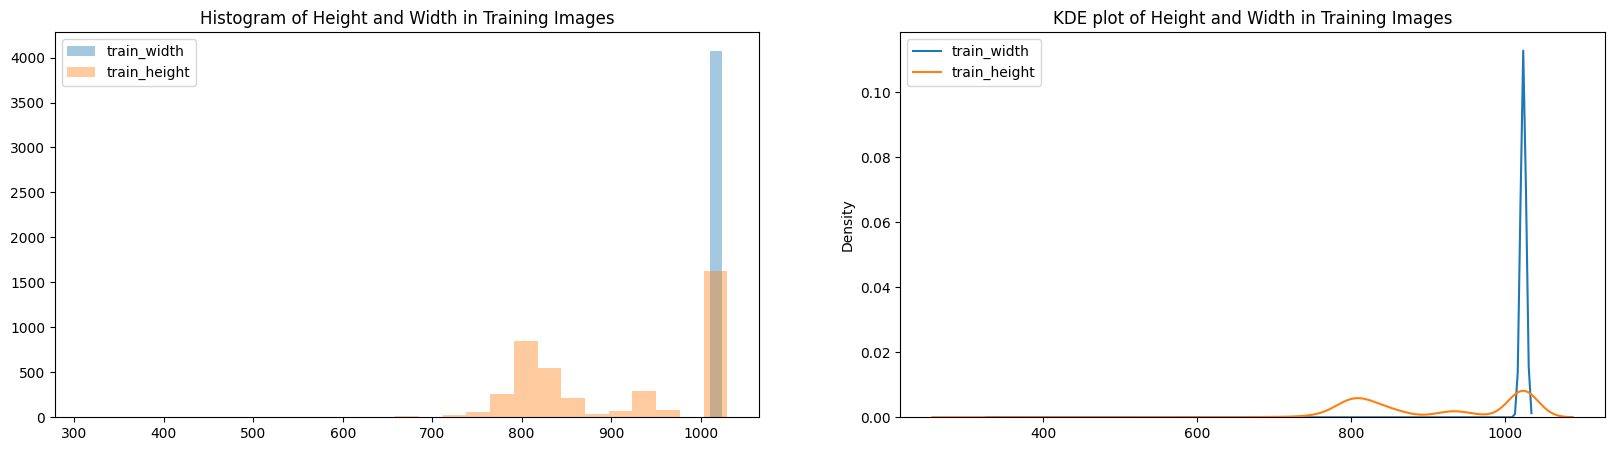

In [10]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.distplot(width_range, kde = False, label = 'train_width')
sns.distplot(height_range, kde = False, label = 'train_height')
plt.legend()
plt.title("Histogram of Height and Width in Training Images")
plt.subplot(1,2,2)
sns.kdeplot(width_range, label = 'train_width')
sns.kdeplot(height_range, label = 'train_height')
plt.legend()
plt.title('KDE plot of Height and Width in Training Images')
plt.show()

In [11]:
width_range_test, height_range_test = image_analysis(test_data, 'DR_data_cropped_classes/test')
avg_width = sum(width_range_test)/len(width_range_test)
avg_height = sum(height_range_test)/len(height_range_test)
max_width = max(width_range_test)
max_height = max(height_range_test)
min_width = min(width_range_test)
min_height = min(height_range_test)
print("Average width of images in training set: {}".format(int(avg_width)))
print("Average height of images in training set: {}".format(int(avg_height)))
print('-'*100)
print("Maximum width of images in test set: {}".format(max_width))
print("Maximum height of images in test set: {}".format(max_height))
print('-'*100)
print("Minimum width of images in test set: {}".format(min_width))
print("Minimum height of images in test set: {}".format(min_height))

Average width of images in training set: 1024
Average height of images in training set: 911
----------------------------------------------------------------------------------------------------
Maximum width of images in test set: 1024
Maximum height of images in test set: 1035
----------------------------------------------------------------------------------------------------
Minimum width of images in test set: 1024
Minimum height of images in test set: 683


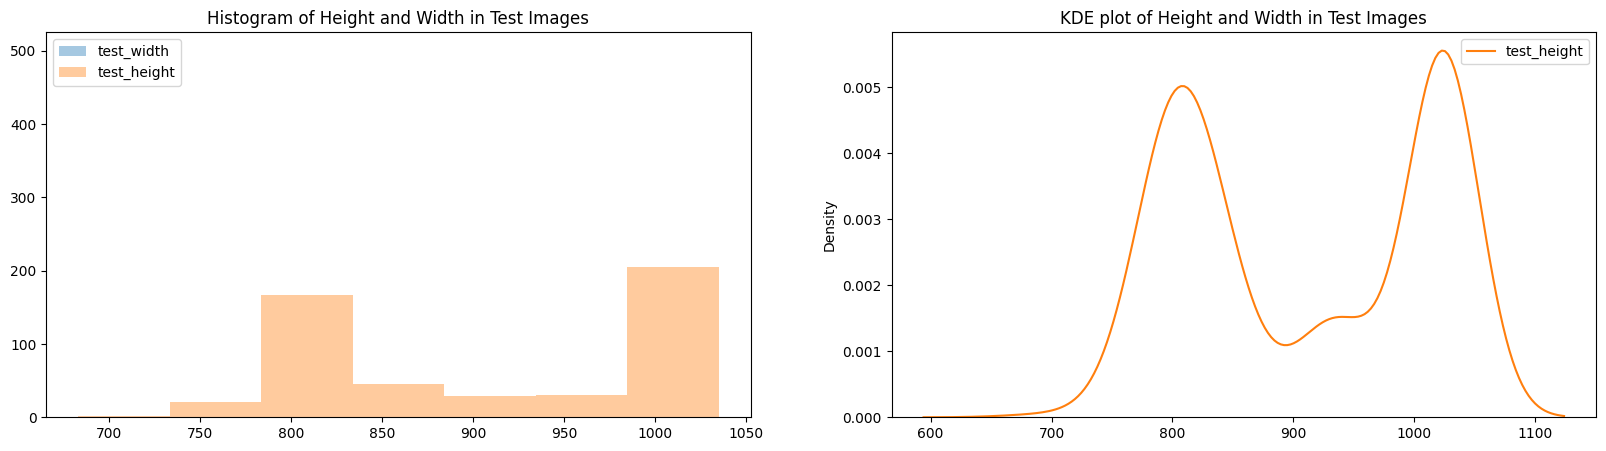

In [12]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.distplot(width_range_test, kde = False, label = 'test_width')
sns.distplot(height_range_test, kde = False, label = 'test_height')
plt.legend()
plt.title("Histogram of Height and Width in Test Images")
plt.subplot(1,2,2)
sns.kdeplot(width_range_test, label = 'test_width')
sns.kdeplot(height_range_test, label = 'test_height')
plt.legend()
plt.title('KDE plot of Height and Width in Test Images')
plt.show()

In [13]:
def splitting_data(train_data, size, is_split = True):
    """
       This function splits the given data into train and validation sets basing on size for validation.
       Args : df - (dataframe) through which splitting is performed
            size - (Integer) test_size -> percentage of data for validation set
            is_split = (boolean) returns train and validation if it is True , otherwise it simply returns the train data
       Outputs : (Series Object) train and validation sets of data

    """
    try:
        if is_split:
            data = train_data['name']
            labels = train_data['stage']
            train_x, validation_x, train_labels, validation_labels = train_test_split(data, labels, stratify=labels, shuffle=True, test_size=size)
            print("Training data: {} {}".format(train_x.shape, train_labels.shape))
            print("Validation data: {} {}".format(validation_x.shape,validation_labels.shape))
            return train_x, train_labels, validation_x, validation_labels
        else:
            return train_data['name'], train_data['stage'], [], []
    except:
        print("Error: Invalid file format, Function argument requires .csv file!!!")

In [14]:
split_size = 0.15
train_x, train_labels, validation_x, validation_labels = splitting_data(train_data, split_size)


Training data: (3468,) (3468,)
Validation data: (612,) (612,)


In [15]:
def class_analysis(labels, d_set):
    """
    This function plots the histogram of class labels for given set of labels.
    Args : labels - (Series object) which contains the class_labels of train or validation sets.
           d_set - (String) which helps to known whether it is a train or validation set.
    Output : None - this function doesn't return anything
    """
    if d_set == 'training': print("-"*100,'\n')
    counter = labels.value_counts().sort_index()
    counter.plot(kind = 'bar')
    plt.title('Number of images for each Class label in {} set'.format(d_set))
    plt.xlabel('Classes')
    plt.ylabel('Number of images')
    plt.grid()
    plt.show()
    iter=0

    for i in list(set(labels)):
        percentage = list(labels).count(i)/len(list(labels))
        print("Number of images in class - {} ({}) , nearly {} % of total data".format(i,class_labels[i],np.round(percentage*100,4)))
        iter+=1
    if d_set == 'training':
        print("\n","="*100,"\n")
    if d_set == 'validation': print("-"*100,'\n')

---------------------------------------------------------------------------------------------------- 



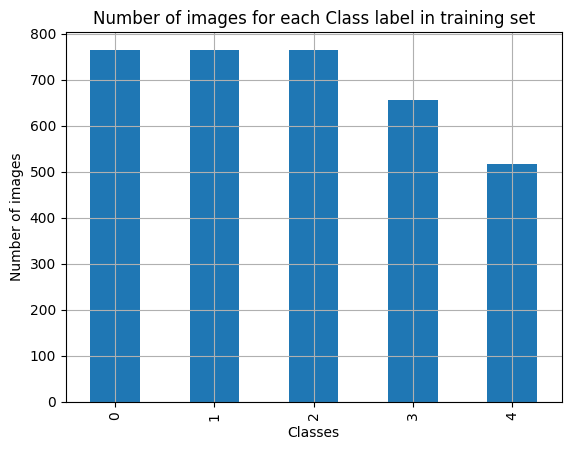

Number of images in class - 0 (No DR) , nearly 22.0588 % of total data
Number of images in class - 1 (Mild) , nearly 22.0588 % of total data
Number of images in class - 2 (Moderate) , nearly 22.0588 % of total data
Number of images in class - 3 (Severe) , nearly 18.9158 % of total data
Number of images in class - 4 (Proliferative DR) , nearly 14.9077 % of total data




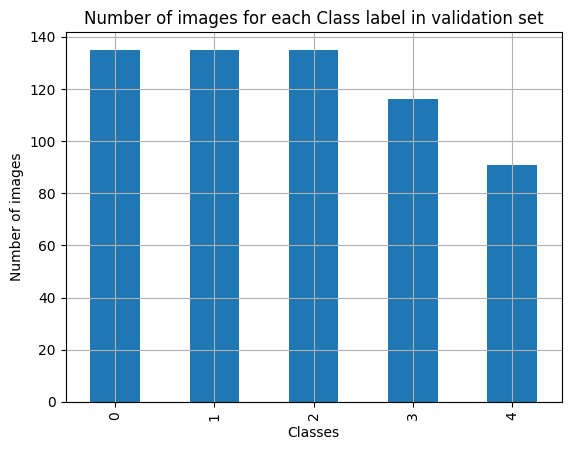

Number of images in class - 0 (No DR) , nearly 22.0588 % of total data
Number of images in class - 1 (Mild) , nearly 22.0588 % of total data
Number of images in class - 2 (Moderate) , nearly 22.0588 % of total data
Number of images in class - 3 (Severe) , nearly 18.9542 % of total data
Number of images in class - 4 (Proliferative DR) , nearly 14.8693 % of total data
---------------------------------------------------------------------------------------------------- 



In [16]:

class_analysis(train_labels,'training')
class_analysis(validation_labels,'validation')


In [17]:
img_width = 224
img_height = 224
no_channels = 3

In [18]:
class ImageProcessing:
    def __init__(self, img_height, img_width, no_channels, tol=7, sigmaX=8):

        ''' Initialzation of variables'''

        self.img_height = img_height
        self.img_width = img_width
        self.no_channels = no_channels
        self.tol = tol
        self.sigmaX = sigmaX

    def cropping_2D(self, img, is_cropping = False):

        '''This function is used for Cropping the extra dark part of the GRAY images'''

        mask = img>self.tol
        return img[np.ix_(mask.any(1),mask.any(0))]

    def cropping_3D(self, img, is_cropping = False):

        '''This function is used for Cropping the extra dark part of the RGB images'''

        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>self.tol

        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # if image is too dark we return the image
            return img
        else:
            img1 = img[:,:,0][np.ix_(mask.any(1),mask.any(0))]  #for channel_1 (R)
            img2 = img[:,:,1][np.ix_(mask.any(1),mask.any(0))]  #for channel_2 (G)
            img3 = img[:,:,2][np.ix_(mask.any(1),mask.any(0))]  #for channel_3 (B)
            img = np.stack([img1,img2,img3],axis=-1)
        return img

    def Gaussian_blur(self, img, is_gaussianblur = False):

        '''This function is used for adding Gaussian blur (image smoothing technique) which helps in reducing noise in the image.'''

        img = cv2.addWeighted(img,4,cv2.GaussianBlur(img,(0,0),self.sigmaX),-4,128)
        return img

    def draw_circle(self,img, is_drawcircle = True):

        '''This function is used for drawing a circle from the center of the image.'''

        x = int(self.img_width/2)
        y = int(self.img_height/2)
        r = np.amin((x,y))     # finding radius to draw a circle from the center of the image
        circle_img = np.zeros((img_height, img_width), np.uint8)
        cv2.circle(circle_img, (x,y), int(r), 1, thickness=-1)
        img = cv2.bitwise_and(img, img, mask=circle_img)
        return img

    def image_preprocessing(self, img, is_cropping = True, is_gaussianblur = True):

        """
        This function takes an image -> crops the extra dark part, resizes, draw a circle on it, and finally adds a gaussian blur to the images
        Args : image - (numpy.ndarray) an image which we need to process
           cropping - (boolean) whether to perform cropping of extra part(True by Default) or not(False)
           gaussian_blur - (boolean) whether to apply gaussian blur to an image(True by Default) or not(False)
        Output : (numpy.ndarray) preprocessed image
        """

        if img.ndim == 2:
            img = self.cropping_2D(img, is_cropping)  #calling cropping_2D for a GRAY image
        else:
            img = self.cropping_3D(img, is_cropping)  #calling cropping_3D for a RGB image
        img = cv2.resize(img, (self.img_height, self.img_width))  # resizing the image with specified values
        img = self.draw_circle(img)  #calling draw_circle
        img = self.Gaussian_blur(img, is_gaussianblur) #calling Gaussian_blur
        return img

In [19]:
def images_per_class(class_labels,num, data_x , is_preprocess = False):

    """
    This function plots "num" number of images per each class
    Args : class_labels - (Series Object) which contains the class_labels of train or validation sets.
           num - (Integer) sample number of images to be plot per each class
           data_x - (Series Object) which contains the id_code of each point in train or validation sets.
           is_preprocess - (boolean) whether to perform image processing(True) on image or not(False by Default)
    Output : None - this function doesn't return anything.
    """

    # class_labels num data_x data_y
    labels = list(set(class_labels))
    classes = ['No DR','Mild','Moderate','Severe','Proliferative DR']
    iter=0
    for i in labels:
        j=1
        plt.figure(figsize=(20,5))
        for row in range(len(data_x)):
            if class_labels.iloc[row] == i:
                if is_preprocess == False:plt.subplot(1,num,j)
                else: plt.subplot(1,num*2,j)
                img = cv2.imread('DR_data_cropped_classes/train'+'/'+str(class_labels.iloc[row])+'/'+data_x.iloc[row])
                img1 = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
                plt.imshow(img1)
                plt.axis('off')
                plt.title("Class = {} ({})".format(class_labels.iloc[row],classes[iter]))
                j+=1
                if is_preprocess == True:
                    obj = ImageProcessing(img_width,img_height,no_channels,sigmaX=14)
                    image = obj.image_preprocessing(img)
                    plt.subplot(1,num*2,j)
                    plt.imshow(image)
                    plt.axis('off')
                    plt.title('==> After Image Processing')
                    j+=1
            if is_preprocess == False and j>num: break
            elif is_preprocess == True and j>num*2: break
        iter+=1
        plt.show()

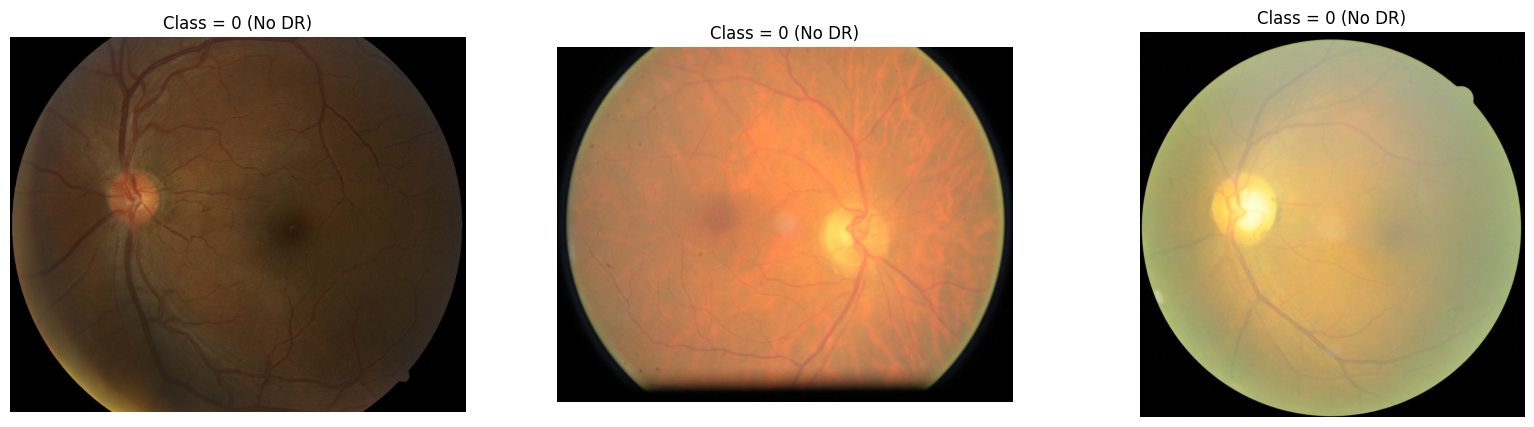

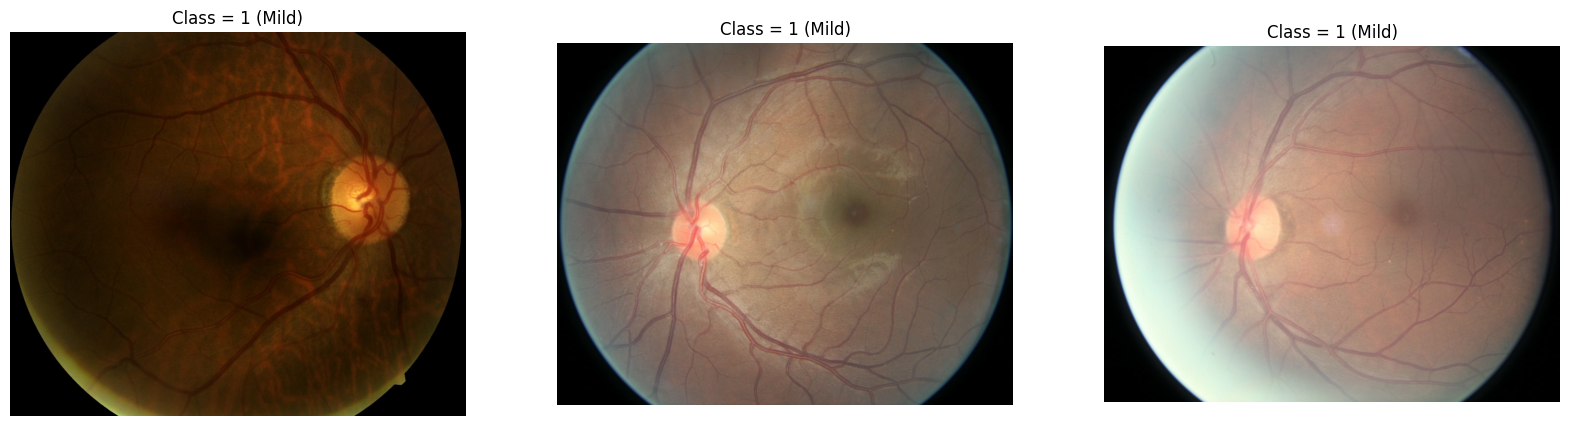

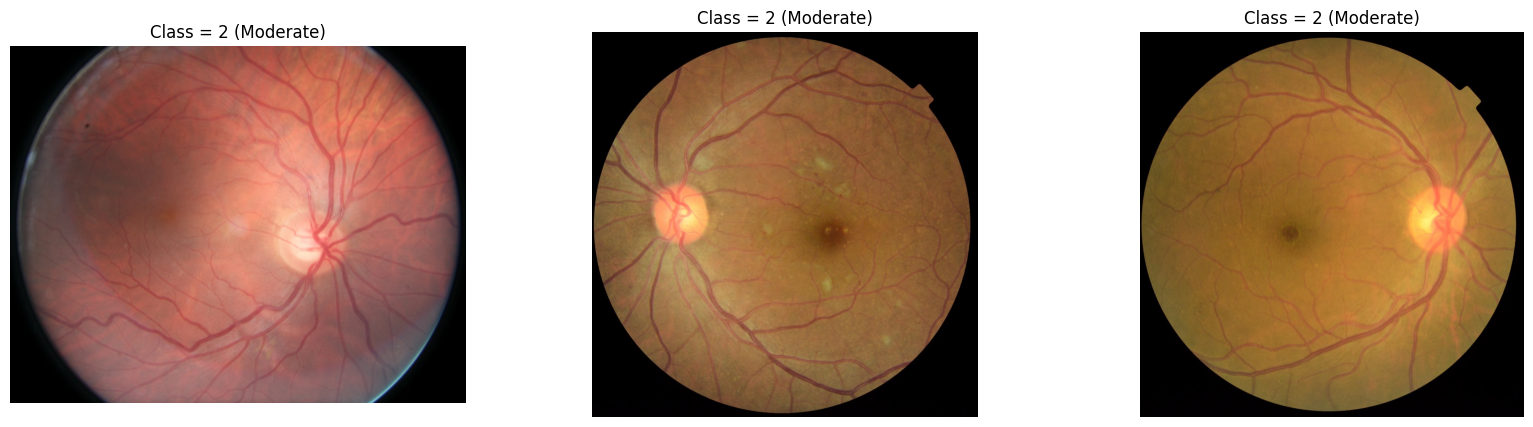

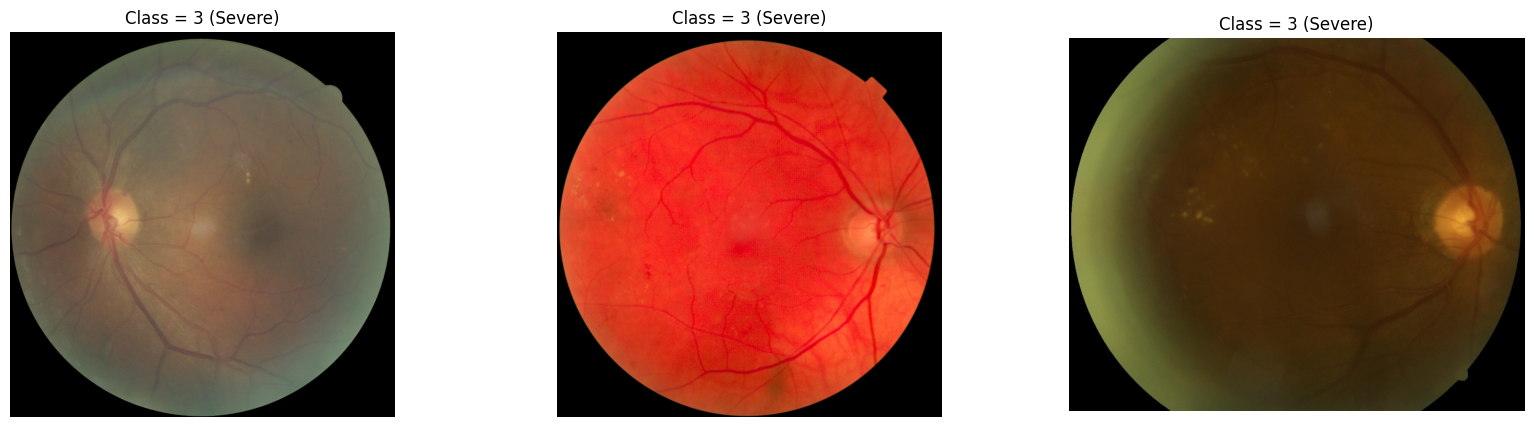

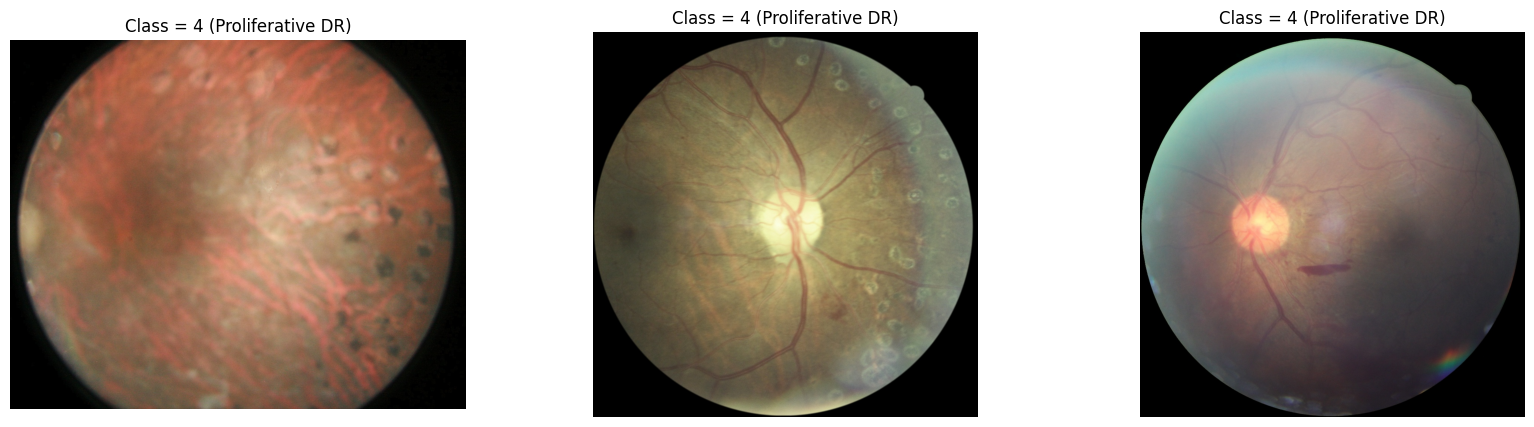

In [20]:
images_per_class(train_labels,3,train_x,False)

In [21]:
def plotting(img, title,i):
    """
    This function is used for subplots
    Args: img (numpy.ndarray) - image we need to plot
          title(string) - title of the plot
          i (integer) -  column number
    output: None - this function doesn't return anything.
    """
    plt.subplot(1,5,i)
    plt.imshow(img)
    plt.axis('off')
    plt.title(title)

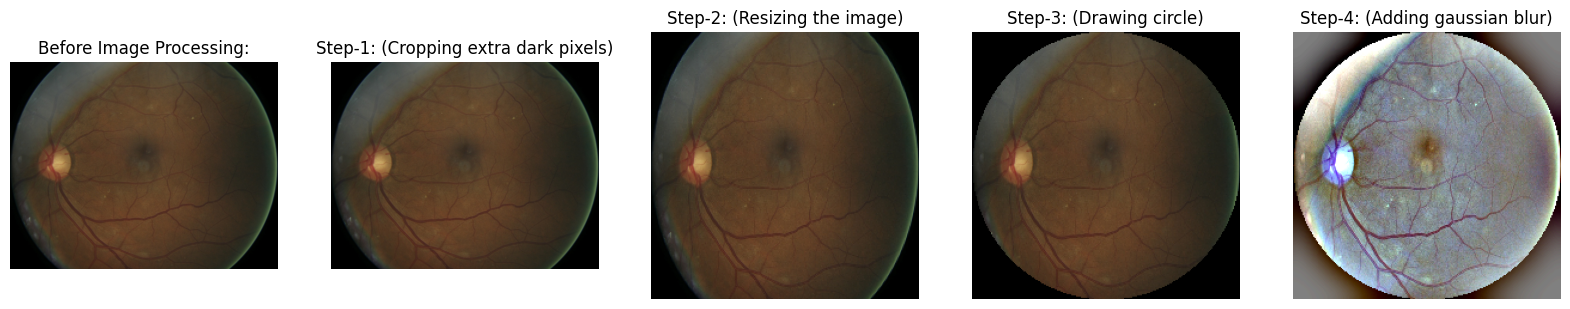

In [22]:
obj1 = ImageProcessing(img_width,img_height, no_channels, sigmaX = 14)
img = 'DR_data_cropped_classes/test/2/1002_right.jpeg'  #random train image
img = cv2.imread(img)
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,5))
plotting(img1,'Before Image Processing:',1)
img1 = obj1.cropping_3D(img1)
plotting(img1,'Step-1: (Cropping extra dark pixels)',2)
img1 = cv2.resize(img1, (img_height,img_width))
plotting(img1,'Step-2: (Resizing the image)',3)
img1 = obj1.draw_circle(img1)
plotting(img1,'Step-3: (Drawing circle)',4)
img = obj1.image_preprocessing(img,'True')
plotting(img,'Step-4: (Adding gaussian blur)',5)

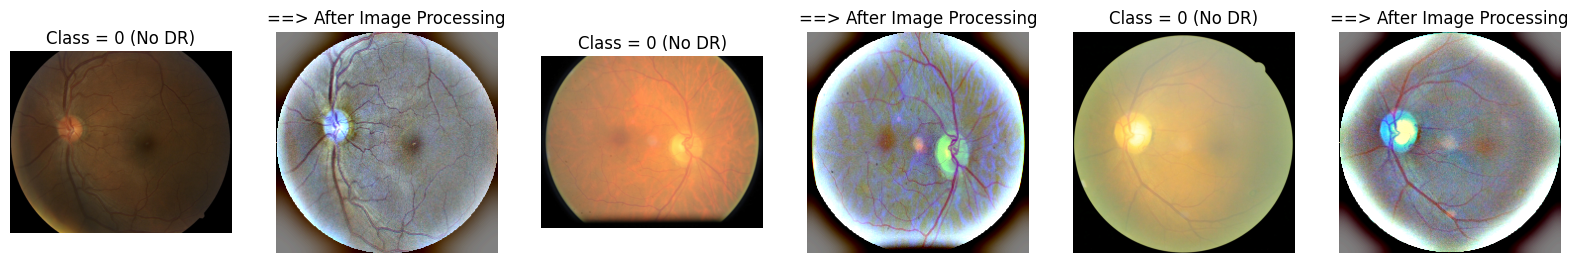

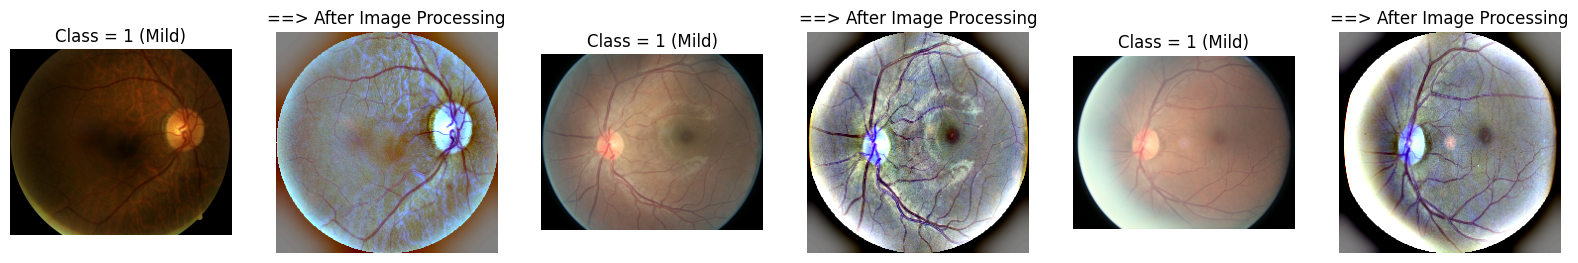

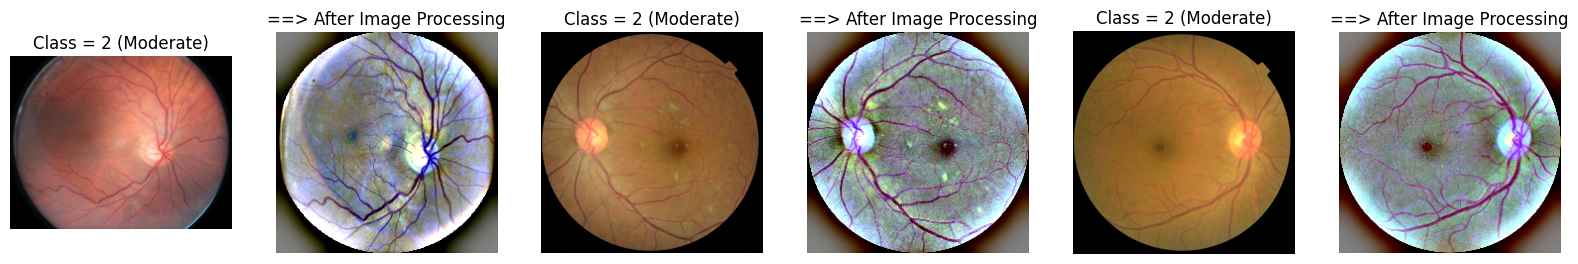

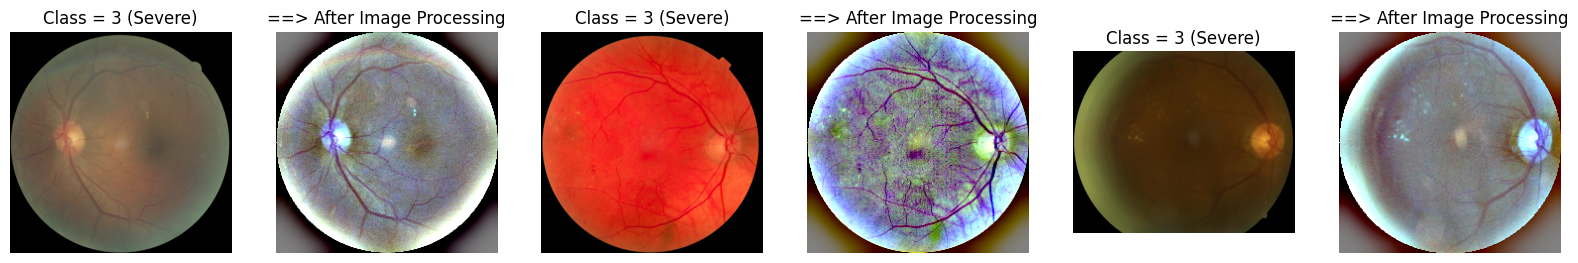

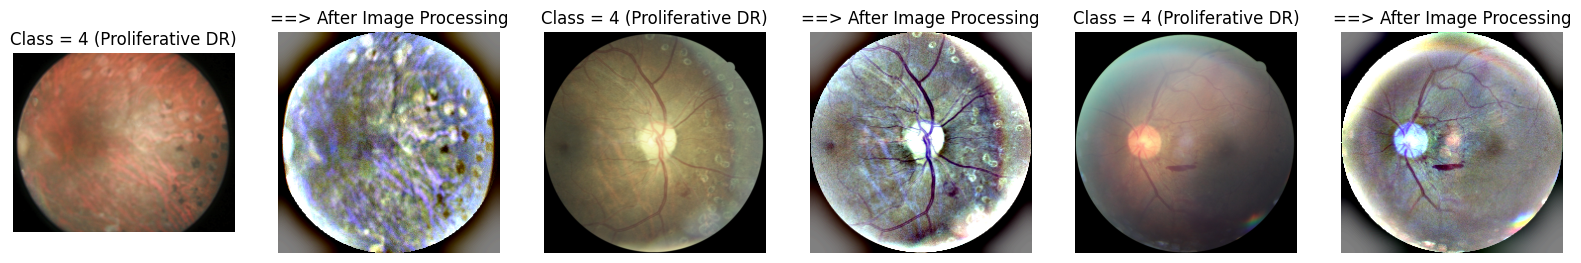

In [23]:
images_per_class(train_labels,3,train_x,True)

In [24]:
df_train= pd.concat([train_x, train_labels], axis=1, keys=['name', 'stage']).reset_index()
df_validation = pd.concat([validation_x, validation_labels], axis=1, keys=['name', 'stage']).reset_index()
df_train.to_pickle('train_data.pkl')
df_validation.to_pickle('vaidation_data.pkl')


In [28]:
def image_2_vector(data, sep):
    """
    This function is used for Converting an images into a vector and storing it in a file (.npy) format.
    Input: data (Series Object) - which contains the path of the images
           sep (String)   - used in file creation
    Output: None - This function doesn't return anything.
    """
    start_time = time.time()  # storing timestamp
    image_vector = np.empty((len(data),img_width, img_height, no_channels), dtype = np.uint8)
    image_processing = ImageProcessing(img_width, img_height, no_channels, sigmaX)  # Object creation
    if sep !='test':
        c = 'DR_data_cropped_classes/train'
    else:
        c = 'DR_data_cropped_classes/test'

    for iter, row in data.iterrows():
        img_path = os.path.join(c, str(row['stage']), row['name'])
        img = cv2.imread(img_path)
        img = image_processing.image_preprocessing(img)    #calling image_preprocessing
        image_vector[iter,:,:,:] = img

    if sep == 'training': print("\nShape of the vector:",image_vector.shape)
    else: print("\n\nShape of the vector:",image_vector.shape)
    print("Time taken to process the {} images: {} seconds".format(sep,np.round(time.time()-start_time,5)))
    path = 'processed_images'
    print("... Saving image_vector to {}".format(path+'/'+sep))

    if sep == 'training':
        print("\n","-"*100,"\n")
    if not os.path.exists(path):
        os.makedirs(path)
    np.save(path+'/'+sep+'.npy', image_vector)  #saving file

In [29]:
sigmaX = 14
image_2_vector(df_train, "training") # function calling
image_2_vector(df_validation,"validation")  #function calling


Shape of the vector: (3468, 224, 224, 3)
Time taken to process the training images: 100.96946 seconds
... Saving image_vector to processed_images/training

 ---------------------------------------------------------------------------------------------------- 



Shape of the vector: (612, 224, 224, 3)
Time taken to process the validation images: 18.48954 seconds
... Saving image_vector to processed_images/validation


In [30]:
image_2_vector(test_data, 'test')



Shape of the vector: (500, 224, 224, 3)
Time taken to process the test images: 15.48056 seconds
... Saving image_vector to processed_images/test


In [31]:
train_x = np.load('processed_images/training.npy')  #training set
validation_x = np.load('processed_images/validation.npy')
test_x = np.load('processed_images/test.npy')    #test set

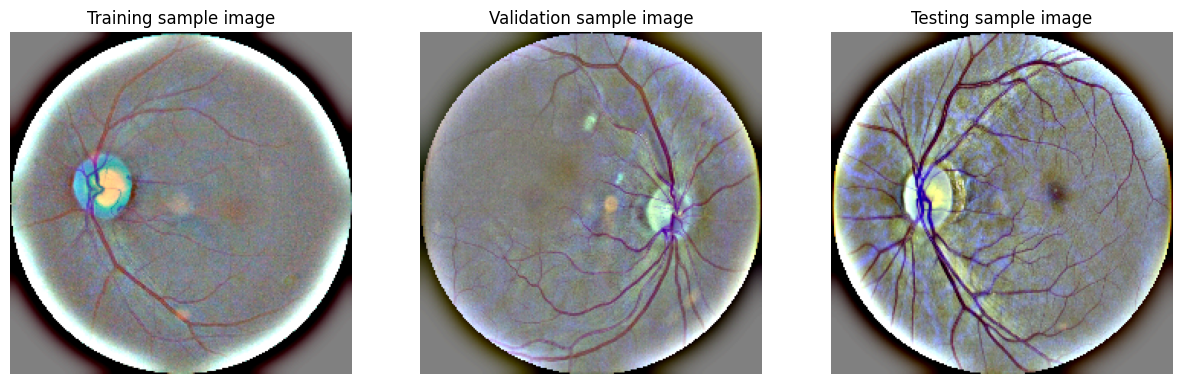

In [32]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.imshow(train_x[8])   #random training example
plt.axis('off')
plt.title("Training sample image")
plt.subplot(132)
plt.imshow(validation_x[120])    #random validation example
plt.title("Validation sample image")
plt.axis('off')
plt.subplot(133)
plt.imshow(test_x[200])        #random test example
plt.title("Testing sample image")
plt.axis('off')
plt.show()